Description: This script will subset DINO EXP16 velocity and deformation radius data.
    Doing so will speed up the remaining computations for vorticity, MKE and EKE.

Method: 
    Use EXP4 mask file to confirm if regridded data set will be of an adequate size.

In [1]:
import xarray as xr

Load in the mask data

In [2]:
mask025_path = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP4/mesh_mask_025.nc'
mask025 = xr.open_dataset(mask025_path)

mask16_path = '~/Python/AI4PEX/DINO/mesh_mask_exp16.nc'
mask16 = xr.open_dataset(mask16_path)

In [52]:
mask025_masked = mask025.where( (-47.5 < mask025.nav_lat) &
                               (mask025.nav_lat < -37.5) &
                               (2.5 < mask025.nav_lon) &
                               (mask025.nav_lon < 17.5)
                               )
mask025_masked


<xarray.Dataset>
Dimensions:       (y: 797, x: 202, time_counter: 1, nav_lev: 36)
Coordinates:
  * nav_lev       (nav_lev) float32 5.034 15.32 25.96 ... 3.757e+03 4.253e+03
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    nav_lat       (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    tmask         (time_counter, nav_lev, y, x) float32 nan nan nan ... nan nan
    umask         (time_counter, nav_lev, y, x) float32 nan nan nan ... nan nan
    vmask         (time_counter, nav_lev, y, x) float32 nan nan nan ... nan nan
    fmask         (time_counter, nav_lev, y, x) float32 nan nan nan ... nan nan
    ...            ...
    e3uw_0        (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
    e3vw_0        (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
    gdept_1d      (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
    gdepw_1d      (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
    gdept_0       (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
    gdepw_0       (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  10/01/2026 15:51:12 +0000

In [53]:
mask025_subsample = mask025_masked.dropna(dim='y', how='all').dropna(dim='x', how='all')
mask025_subsample

<xarray.Dataset>
Dimensions:       (y: 54, x: 60, time_counter: 1, nav_lev: 36)
Coordinates:
  * nav_lev       (nav_lev) float32 5.034 15.32 25.96 ... 3.757e+03 4.253e+03
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x) float32 2.625 2.875 3.125 3.375 ... 16.88 17.12 17.38
    nav_lat       (y, x) float32 -47.42 -47.42 -47.42 ... -37.69 -37.69 -37.69
    tmask         (time_counter, nav_lev, y, x) float32 1.0 1.0 1.0 ... 0.0 0.0
    umask         (time_counter, nav_lev, y, x) float32 1.0 1.0 1.0 ... 0.0 0.0
    vmask         (time_counter, nav_lev, y, x) float32 1.0 1.0 1.0 ... 0.0 0.0
    fmask         (time_counter, nav_lev, y, x) float32 1.0 1.0 1.0 ... 0.0 0.0
    ...            ...
    e3uw_0        (time_counter, nav_lev, y, x) float64 10.07 10.07 ... 592.6
    e3vw_0        (time_counter, nav_lev, y, x) float64 10.07 10.07 ... 592.6
    gdept_1d      (time_counter, nav_lev, y, x) float64 5.034 ... 4.253e+03
    gdepw_1d      (time_counter, nav_lev, y, x) float64 0.0 0.0 ... 4e+03 4e+03
    gdept_0       (time_counter, nav_lev, y, x) float64 5.034 ... 4.309e+03
    gdepw_0       (time_counter, nav_lev, y, x) float64 0.0 0.0 ... 4e+03 4e+03
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  10/01/2026 15:51:12 +0000

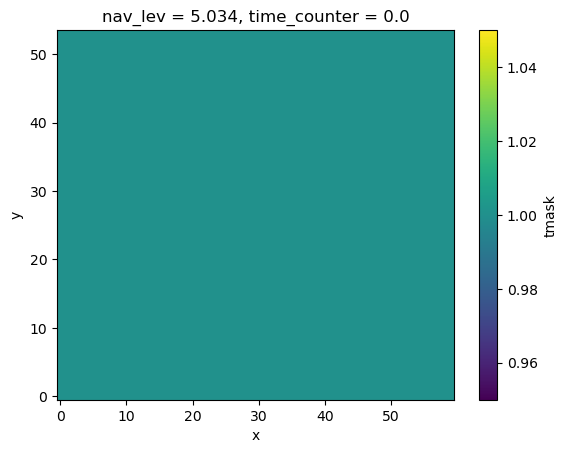

In [54]:
mask025_subsample.tmask.isel(nav_lev=0).plot()

Check the domain sizes for a specific region

Load in the velocity data

In [30]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/'
ds = xr.open_dataset(directory + 'MINT_1d_00621101_00621130_ug.nc')

In [27]:
ds

<xarray.Dataset>
Dimensions:              (y: 3183, x: 802, time_counter: 30, axis_nbounds: 2)
Coordinates:
  * time_counter         (time_counter) object 0062-11-02 00:00:00 ... 0062-1...
    gphiu                (y, x) float64 ...
    glamu                (y, x) float64 ...
    time_instant         (time_counter) object ...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    ug                   (y, x, time_counter) float64 ...
    time_counter_bounds  (time_counter, axis_nbounds) object ...
Attributes:
    name:         NEMO dataset
    description:  Geostrophic ocean current in i direction                   ...

Subset ds

In [45]:
ds_masked = ds.where( (-47.5 < ds.gphiu) &
            (ds.gphiu < -37.5) &
            (2.5 < ds.glamu) &
            (ds.glamu < 17.5)
            )

In [46]:
ds_subset = ds_masked.dropna(dim='y', how='all').dropna(dim='x', how='all')

Some plots

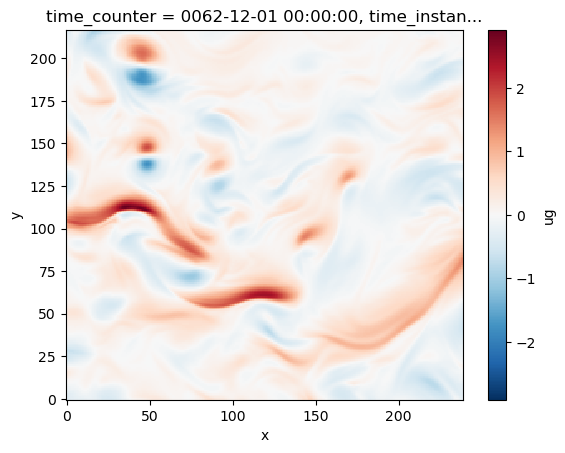

In [50]:
ds_subset.ug.isel(time_counter=29).plot()

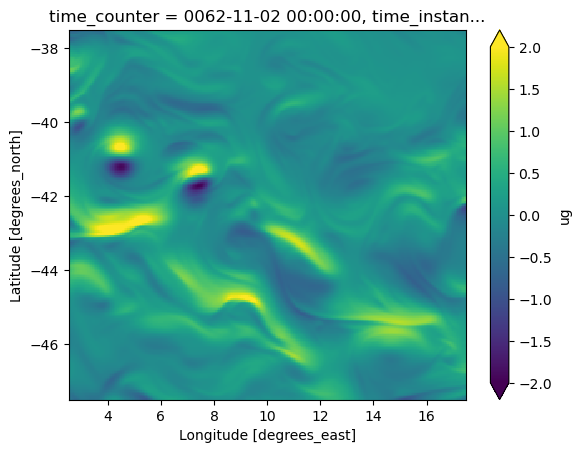

In [51]:
ds_subset.ug.isel(time_counter=0).plot(x='glamu', y='gphiu', vmin=-2, vmax=2)

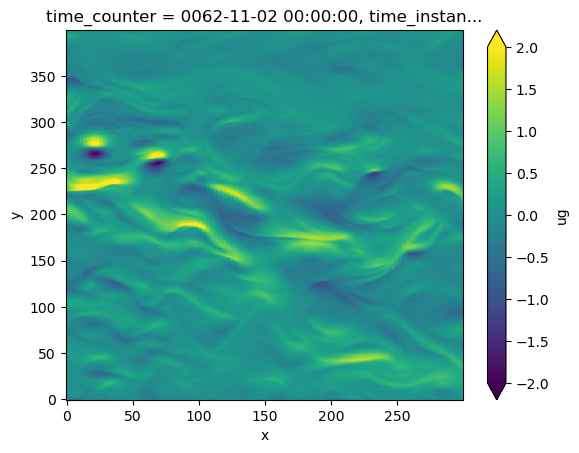

In [11]:
ds.ug.isel(time_counter=0, x=slice(50,350), y=slice(600,1000)).plot(vmin=-2, vmax=2)

--------------------------
Now we have established our lat and lon for the SO_JET region, we can start to develop the script

In [58]:
variable = 'ug'
region = 'SO_JET'
save_directory = f'/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/{region}/'

Assign bounds for SO_JET

In [62]:
lat_min = -47.5
lat_max = -37.5
lon_min = 2.5
lon_max = 17.5

Load in dataset

In [59]:
ds = xr.open_dataset(directory + f'MINT_1d_00621101_00621130_{variable}.nc')

Now mask and subset it

In [63]:
ds_masked = ds.where( (lat_min < ds.gphiu) &
            (ds.gphiu < lat_max) &
            (lon_min < ds.glamu) &
            (ds.glamu < lon_max)
            )

ds_subset = ds_masked.dropna(dim='y', how='all').dropna(dim='x', how='all')

Save dataset to netcdf

In [64]:
ds_subset

<xarray.Dataset>
Dimensions:              (y: 217, x: 239, time_counter: 30, axis_nbounds: 2)
Coordinates:
  * time_counter         (time_counter) object 0062-11-02 00:00:00 ... 0062-1...
    gphiu                (y, x) float64 -47.46 -47.46 -47.46 ... -37.55 -37.55
    glamu                (y, x) float64 2.562 2.625 2.688 ... 17.31 17.38 17.44
    time_instant         (time_counter) object ...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    ug                   (y, x, time_counter) float64 -0.3837 -0.404 ... 0.03676
    time_counter_bounds  (time_counter, axis_nbounds, y, x) object 0062-11-02...
Attributes:
    name:         NEMO dataset
    description:  Geostrophic ocean current in i direction                   ...

In [65]:
ds_subset.to_netcdf(save_directory + f'MINT_1d_00621101_00621130_{variable}_{region}.nc')

Some miscellaneous code

In [70]:
import glob


nemo_files = [f'MINT_1d_00610101_*{variable}.nc']

nemo_paths = [glob.glob(directory + f) for f in nemo_files]

In [72]:
nemo_paths[0][0]

'/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/MINT_1d_00610101_00610130_ug.nc'

In [73]:
filename = nemo_paths[0][0].split('/')[-1]
date_end = filename.split('_')[3]
date_end

'00610130'